# PiPACT Data Processing
The following program will process data generated by the PiPACT reference code.

 # Imports
 Make sure that the following code block is run before the Specilized or Graphical Data blocks to ensure there are no importation errors.

In [21]:
#Imports

import pandas as pd
import numpy as np
from datetime import datetime

# Specilized Data
The following code will prompt the user for a filepath condtaining a .csv document. If the filepath is valid, the code will generate a Pandas dataframe along with other useful information. This information includes: the total number of scans, the unique addresses (and how many there are), the amount of time the scanner collected data, and the maximum, minimum, mean, and standard deviation values for both TX Power and RSSI. This code can be run with multiple files, but only one at a time.

In [22]:
#Get specilized data on a single file

#Import csv document
#Loop to ensure the user inputs a real file
while True:
    try:
        file = input("Please enter the filepath\n")
        pd.set_option('display.max_rows', 10)
        data = pd.read_csv (file)
        break
    except FileNotFoundError:
        print("File not found. Please Try again.\nIf your file name has leading or trailing quotation marks, please remove them.")

#Create data subsets for analysis

#Number of scans
scans = data.shape[0]

#Addresses
adds = data.loc[:, 'ADDRESS']
unique_adds = adds.drop_duplicates()
unique_adds_count = unique_adds.shape[0]
unique_adds = unique_adds.values.tolist()

#Time
time_begin = data.at[0, 'TIMESTAMP']
time_end = data.at[scans-1, 'TIMESTAMP']
beginning = datetime.strptime(time_begin, '%Y-%m-%d %H:%M:%S.%f')
ending = datetime.strptime(time_end, '%Y-%m-%d %H:%M:%S.%f')
time_total = ending - beginning
time_total = time_total.seconds

#TX Power
tx = data.loc[:, 'TX POWER']

#RSSI
rssi =data.loc[:, 'RSSI']

#Find statistics

#TX Power
tx_max = tx.max()
tx_min = tx.min()
tx_ave = tx.mean()
tx_std = tx.std()

#RSSI
rssi_max = rssi.max()
rssi_min = rssi.min()
rssi_ave = rssi.mean()
rssi_std = rssi.std()

#Print dataframe and stats

#If the user wants the full dataframe, provide it
#If not, provide a reduced, ten line frame
answer = False
want_full = False
while(answer != True):
    full = input("Would you like the full dataframe of " + str(scans) + " rows or a reduced version?\nF or R\n")
    if ((full == "f") | (full == "F")):
        #Provide full frame
        pd.set_option('display.max_rows', None)
        want_full = True
        answer = True
    elif((full == "r") | (full == "R")):
        #Provide reduced freame
        pd.set_option('display.max_rows', 10)
        answer = True
    else:
        #Make the user enter a F or R
        print("Please enter either F or R\n")

#Provide statistics
print("\nTX Statistics:")
print("Maximum " + str(tx_max) + "; Minimum " + str(tx_min) + "; Mean " + str(round(tx_ave, 4)) + "; Standard Deviation " + str(round(tx_std, 4)))
print("\nRSSI Statistics:")
print("Maximum " + str(rssi_max) + "; Minimum " + str(rssi_min) + "; Mean " + str(round(rssi_ave, 4)) + "; Standard Deviation " + str(round(rssi_std, 4)))
print("\nOther Statistics:")
print("Total Scans " + str(scans) + "; Unique Addresses " + str(unique_adds_count) + ", they are " + str(unique_adds) + "; Total Time " + str(time_total) + " seconds")


data

Please enter the filepath
C:\Users\Owner\Desktop\piPACT\Data\Direct Line of Sight\DLOS - 5m.csv
Would you like the full dataframe of 214 rows or a reduced version?
F or R
r

TX Statistics:
Maximum 1; Minimum 1; Mean 1.0; Standard Deviation 0.0

RSSI Statistics:
Maximum -61; Minimum -77; Mean -68.5047; Standard Deviation 5.2449

Other Statistics:
Total Scans 214; Unique Addresses 1, they are ['DC:A6:32:2C:6B:63']; Total Time 298 seconds


,SCAN,ADDRESS,TIMESTAMP,UUID,MAJOR,MINOR,TX POWER,RSSI
0,0,DC:A6:32:2C:6B:63,2020-07-01 22:02:44.906330,1a37c93e-bc08-11ea-8486-dca6322c6b62,1,1,1,-73
1,1,DC:A6:32:2C:6B:63,2020-07-01 22:02:45.099619,1a37c93e-bc08-11ea-8486-dca6322c6b62,1,1,1,-71
2,2,DC:A6:32:2C:6B:63,2020-07-01 22:02:46.111188,1a37c93e-bc08-11ea-8486-dca6322c6b62,1,1,1,-72
3,3,DC:A6:32:2C:6B:63,2020-07-01 22:02:47.118770,1a37c93e-bc08-11ea-8486-dca6322c6b62,1,1,1,-74
4,4,DC:A6:32:2C:6B:63,2020-07-01 22:02:48.117441,1a37c93e-bc08-11ea-8486-dca6322c6b62,1,1,1,-72
...,...,...,...,...,...,...,...,...
209,209,DC:A6:32:2C:6B:63,2020-07-01 22:07:39.184924,1a37c93e-bc08-11ea-8486-dca6322c6b62,1,1,1,-62
210,210,DC:A6:32:2C:6B:63,2020-07-01 22:07:40.191199,1a37c93e-bc08-11ea-8486-dca6322c6b62,1,1,1,-62
211,211,DC:A6:32:2C:6B:63,2020-07-01 22:07:41.193893,1a37c93e-bc08-11ea-8486-dca6322c6b62,1,1,1,-74
212,212,DC:A6:32:2C:6B:63,2020-07-01 22:07:42.197638,1a37c93e-bc08-11ea-8486-dca6322c6b62,1,1,1,-62


# Graphical Data
The following code will prompt the user for various .csv files and distances. The RSSI values will be extracted from each file and combined with that file's seperation distance to create a scatter plot. This plot will show a general trand between RSSI values and the distance between two devices given the constraints of the experiment.

How many sheets of data would you like to enter?2
Please enter the filepath
You may also 'Exit' to begin again.C:\Users\Owner\Desktop\piPACT\Data\Direct Line of Sight\DLOS - 5m.csv
How far away (in meters) were the devices in this experiment?5
Please enter the filepath
You may also 'Exit' to begin again.C:\Users\Owner\Desktop\piPACT\Data\Direct Line of Sight\DLOS - 1m.csv
How far away (in meters) were the devices in this experiment?1


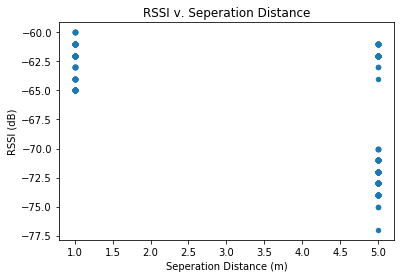

In [23]:
#Plot data for the entire experiment

#Get the total amount of sheets, inlcuding the filespaths, from the user
total_sheets = find_total_sheets()
data_range = find_sheet_files(total_sheets)

#Get RSSI Values from each dataset
data_points = []
for i in range(0, len(data_range), 2):
    data_sheet = pd.read_csv (data_range[i])
    rssi_vals = data_sheet.loc[:, 'RSSI'] 
    rssi_vals = rssi_vals.values.tolist()
    
    #Create a list of points for the graph
    for j in range(0, len(rssi_vals)):
        data_points.append((data_range[i+1], rssi_vals[j]))
        
#Generate scatter plot
sp_DataFrame = pd.DataFrame(data=data_points, columns=['Seperation Distance (m)','RSSI (dB)'])
sp_DataFrame.plot.scatter(x='Seperation Distance (m)', y='RSSI (dB)', title= "RSSI v. Seperation Distance")

#Functions

def find_total_sheets():
    #See how many total sheets the user is entering
    total_sheets = -1
    while (total_sheets <= 0):
        while (type(total_sheets != int)):
            total_sheets = input("How many sheets of data would you like to enter?\n")
            if (total_sheets.isnumeric() == True):
                total_sheets = int(total_sheets)
                break
    return(total_sheets)

def find_sheet_files(total_sheets):
    data_range = []
    for i in range(total_sheets):
        #Loop to ensure the user inputs a real file
        while True:
            try:
                file = input("Please enter the filepath\nYou may also 'Exit' to begin again.\n")
                dummy_data = pd.read_csv (file)
                data_range.append(file)
                data_range.append(find_seperation())
                break
            except FileNotFoundError:
                if (file == "Exit") | (file == "exit"):
                    i = 0
                    data_range.clear()
                    print("Restarting...\n")
                    total_sheets = find_total_sheets()
                    return(find_sheet_files(total_sheets))
                else:
                    print("\nFile not found. Please Try again.\nIf your file name has leading or trailing quotation marks, please remove them.\n")
    return(data_range)

def find_seperation():
    #Ask user for the distance between the devices
    seperation = 0.0
    while seperation <= 0.0:
        while (type(total_sheets != float)):
            seperation = input("How far away (in meters) were the devices in this experiment?\n")
            seperation = float(seperation)
            break
    return(seperation)